Our code for "Google Chrome" task

In [ ]:
"""Google Chrome history"""
def sites_on_date(visits: list, date: str) -> set:
    """
    Returns set of all urls that have been visited
    on current date
    :param visits: all visits in browser history
    :param date: date in format "yyyy-mm-dd"
    :return: set of url visited on date
    >>> print(sites_on_date([('https://www.youtube.com/?hl=uk&gl=UA', \
'YouTube', '2023-10-21', '14:26:55.421209', 757275), \
('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-22', '14:26:56.177574', 105387), \
('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', \
'14:26:56.281244', 1143648), \
('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232)], '2023-10-22'))
    {'https://www.youtube.com/?hl=uk&gl=UA'}
    """
    if isinstance(visits, list) and isinstance(date, str):
        inf = set()
        for item in visits:
            if date in item:
                inf.add(item[0])
        return inf
    return None

def most_frequent_sites(visits: list, number: int) -> set:
    """
    Returns set of most frequent sites visited in total
    Return only 'number' of most frequent sites visited
    :param visits: all visits in browser history
    :param number: number of most frequent sites to return
    :return: set of most frequent sites
    >>> print(most_frequent_sites([('https://www.youtube.com/?hl=uk&gl=UA', \
'YouTube', '2023-10-21', '14:26:55.421209', 757275), \
('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:56.177574', 105387), \
('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', \
'14:26:56.281244', 1143648), \
('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232)], 1))
    {'https://www.youtube.com/?hl=uk&gl=UA'}
    """
    if isinstance(visits, list) and isinstance(number, int):
        dictionary = {}
        for item in visits:
            if item[0] not in dictionary:
                dictionary[item[0]] = 1
            else:
                dictionary[item[0]] += 1
        sorted_dict_descending = dict(sorted(dictionary.items(), key=lambda item: item[1], \
            reverse=True))
        most_frequent = set()
        counter = 0
        for value in sorted_dict_descending:
            if counter != number:
                most_frequent.add(value)
                counter += 1
            else:
                break
        return most_frequent

def get_url_info(visits: list, url: str) -> tuple:
    """
    Returns tuple with info about site, which title is passed
    Function should return:
    title - title of site with this url
    last_visit_date - date of the last visit of this site, in format "yyyy-mm-dd"
    last_visit_time - time of the last visit of this site, in format "hh:mm:ss.ms"
    num_of_visits - how much time was this site visited
    average_time - average time, spend on this site
    :param visits: all visits in browser history
    :param url: url of site to search
    :return: (title, last_visit_date, last_visit_time, num_of_visits, average_time)
    >>> print(get_url_info([('https://www.youtube.com/?hl=uk&gl=UA', \
'YouTube', '2023-10-21', '14:26:55.421209', 757275), \
('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:56.177574', 105387), \
('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', \
'14:26:56.281244', 1143648), \
('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232)], \
'https://www.youtube.com/?hl=uk&gl=UA'))
    ('YouTube', '2023-10-21', '14:26:56.177574', 2, 431331.0)
    >>> get_url_info([], "https://mail.google.com/mail/u/0/")

    """
    if isinstance(visits, list) and isinstance(url, str) and len(visits) != 0:
        num_of_visits = 0
        aver_time = []
        for item in visits:
            if url in item:
                num_of_visits += 1
                title = item[1]
                last_visit_date = item[2]
                last_visit_time = item[3]
                aver_time.append(item[-1])
        if num_of_visits == 0:
            return ('', '', '', 0, 0)
        try:
            average_time = sum(aver_time) / len(aver_time)
        except ZeroDivisionError:
            average_time = 0
        try:
            result = (title, last_visit_date, last_visit_time, num_of_visits, average_time)
            return result
        except UnboundLocalError:
            return None
    return None

if __name__ == '__main__':
    import doctest
    print(doctest.testmod())

Passed tests:

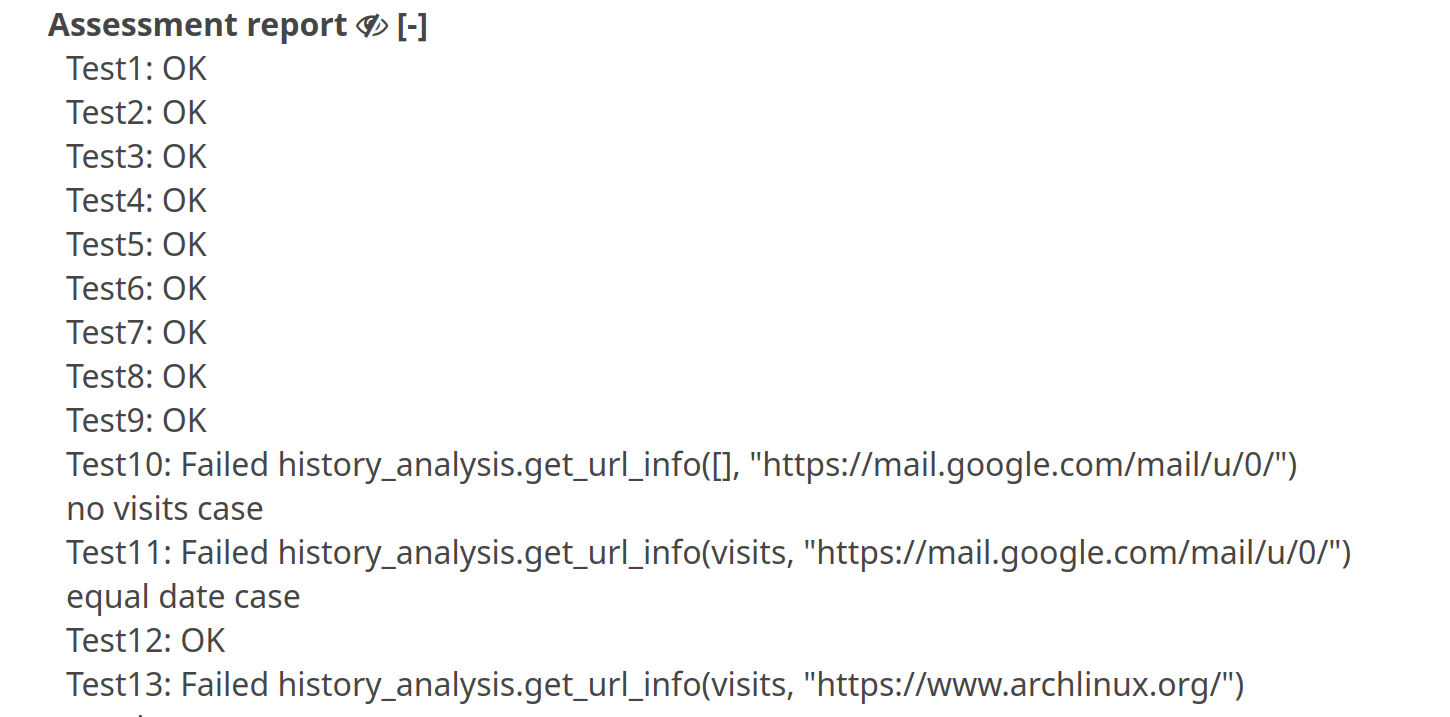

Request 1: (description of task)

Write unittests for provided task

Generated unittests:

In [ ]:
import unittest
from history_analysis import sites_on_date, most_frequent_sites, get_url_info

class TestHistoryAnalysis(unittest.TestCase):

    # Sample browser history data for testing
    visits = [
        ("https://example.com", "Example Domain", "2024-04-24", "12:30:00", 10),
        ("https://example.com", "Example Domain", "2024-04-25", "14:45:00", 5),
        ("https://example2.com", "Example 2", "2024-04-24", "13:00:00", 8),
        ("https://example3.com", "Example 3", "2024-04-25", "15:00:00", 3)
    ]

    def test_sites_on_date(self):
        self.assertEqual(sites_on_date(self.visits, "2024-04-24"), {"https://example.com", "https://example2.com"})
        self.assertEqual(sites_on_date(self.visits, "2024-04-25"), {"https://example.com", "https://example3.com"})

    def test_most_frequent_sites(self):
        self.assertEqual(most_frequent_sites(self.visits, 1), {"https://example.com"})
        self.assertEqual(most_frequent_sites(self.visits, 2), {"https://example.com", "https://example2.com"})
        self.assertEqual(most_frequent_sites(self.visits, 3), {"https://example.com", "https://example2.com", "https://example3.com"})

    def test_get_url_info(self):
        self.assertEqual(get_url_info(self.visits, "https://example.com"), ("Example Domain", "2024-04-25", "14:45:00", 2, 7.5))
        self.assertEqual(get_url_info(self.visits, "https://example2.com"), ("Example 2", "2024-04-24", "13:00:00", 1, 8))
        self.assertEqual(get_url_info(self.visits, "https://example3.com"), ("Example 3", "2024-04-25", "15:00:00", 1, 3))

if __name__ == '__main__':
    unittest.main()


Coverage:

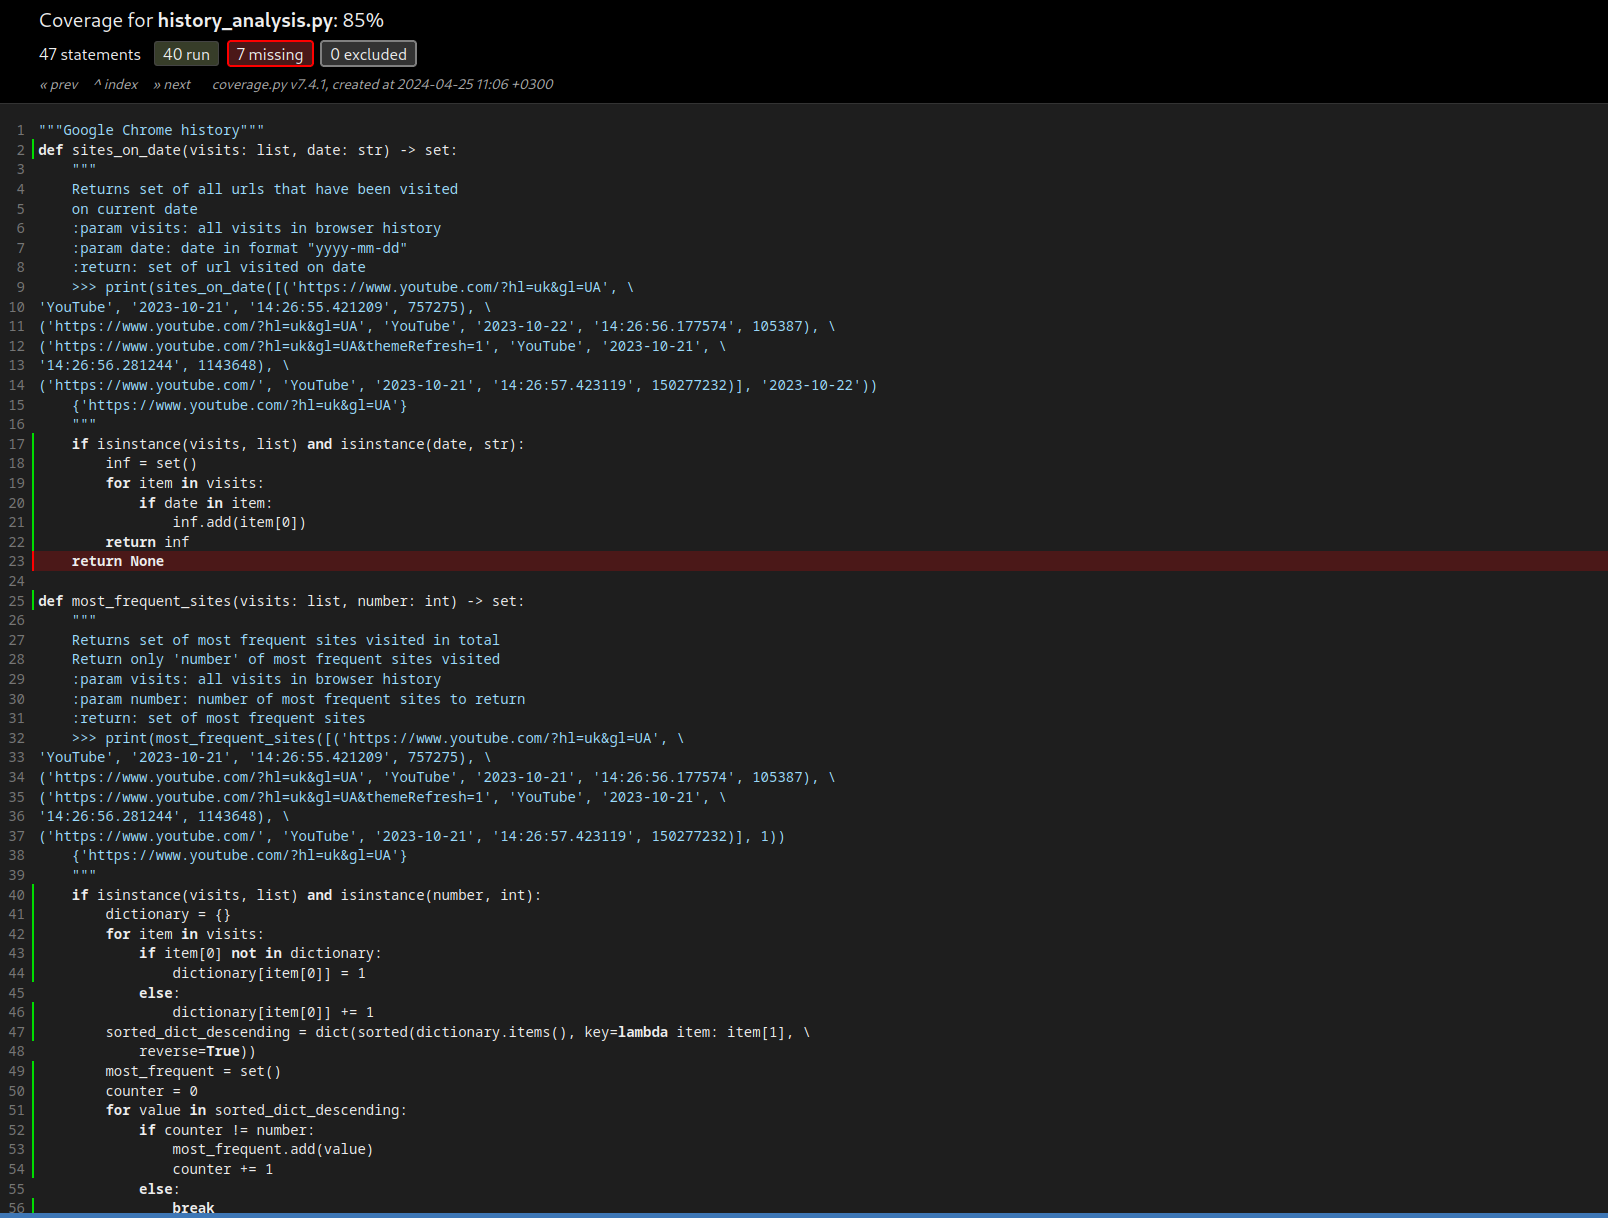
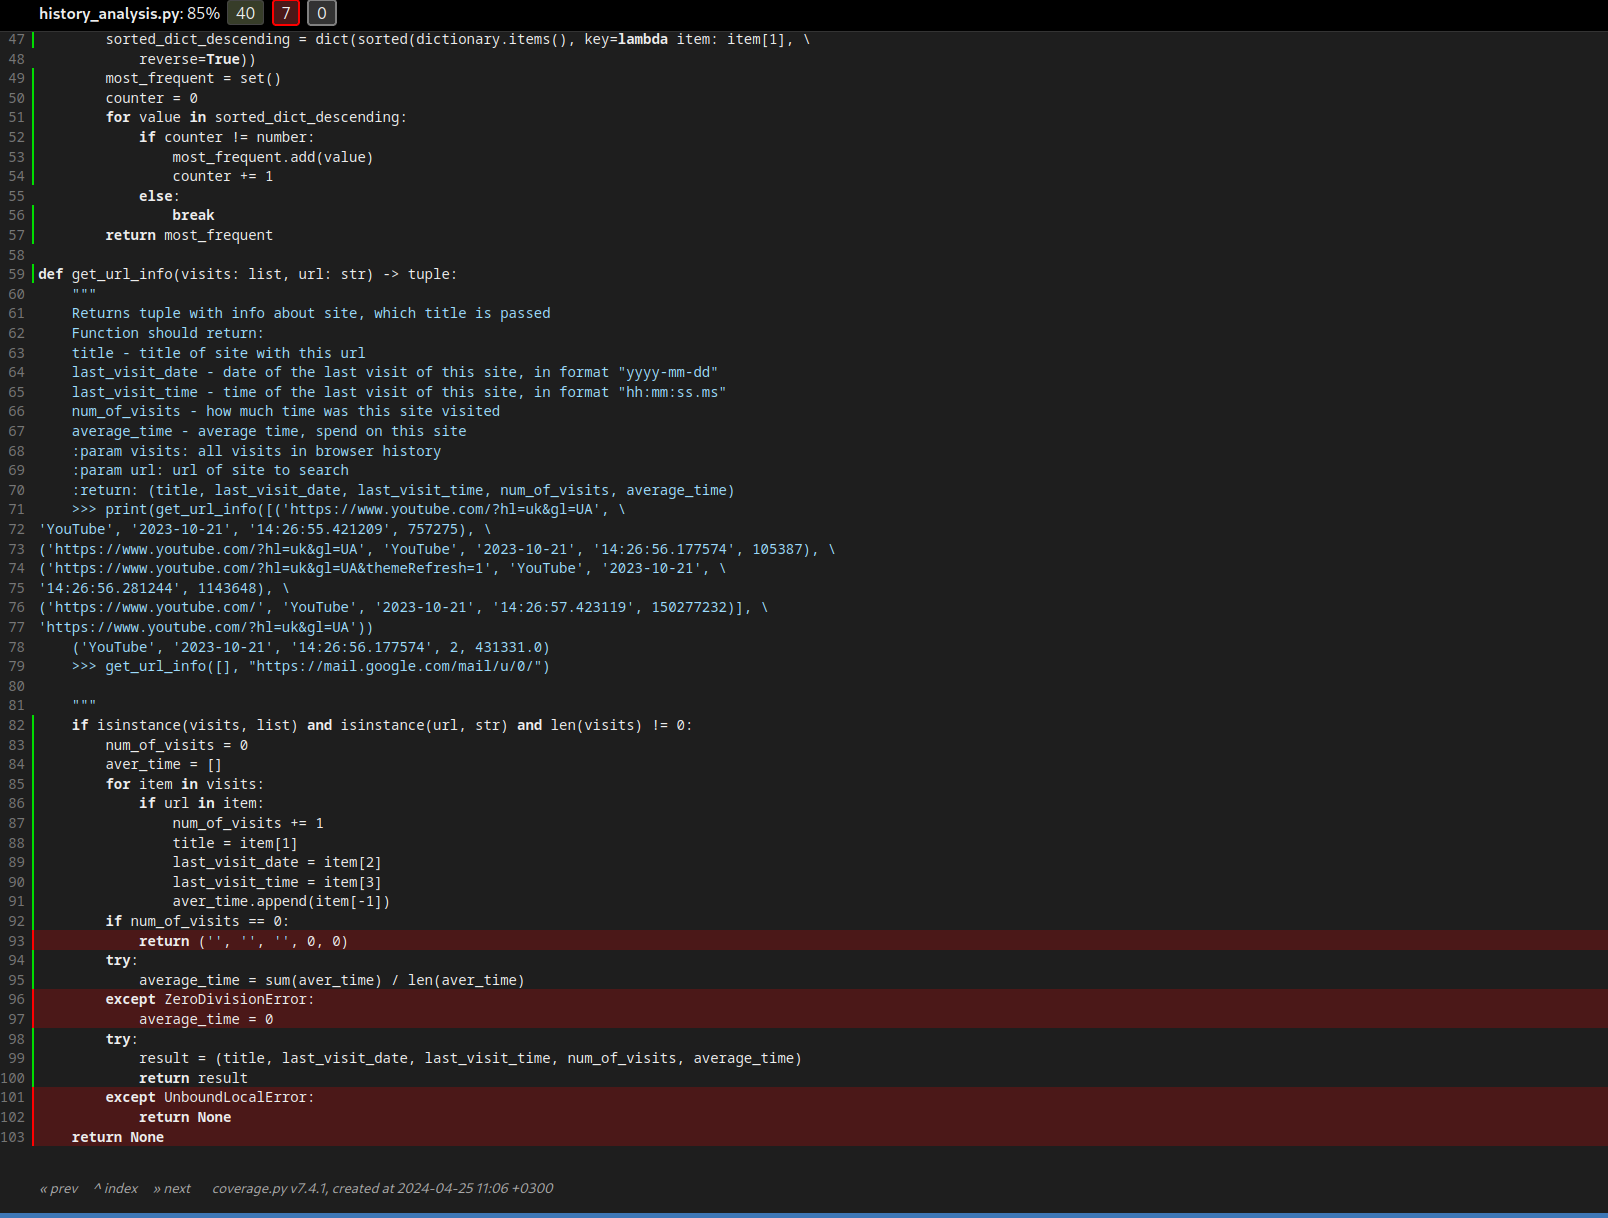
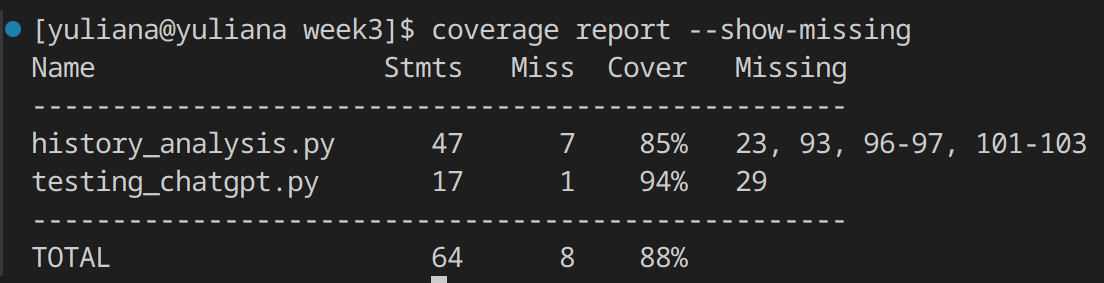
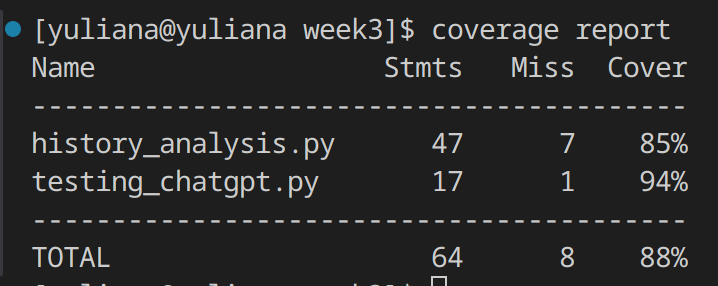

Request 2: You didn`t cover the lines 23, 93, 96-97, 101-103 in unittest. Try to fix this problem

Generated code:

In [ ]:
import unittest
from history_analysis import sites_on_date, most_frequent_sites, get_url_info

class TestHistoryAnalysis(unittest.TestCase):

    # Sample browser history data for testing
    visits = [
        ("https://example.com", "Example Domain", "2024-04-24", "12:30:00", 10),
        ("https://example.com", "Example Domain", "2024-04-25", "14:45:00", 5),
        ("https://example2.com", "Example 2", "2024-04-24", "13:00:00", 8),
        ("https://example3.com", "Example 3", "2024-04-25", "15:00:00", 3)
    ]

    def test_sites_on_date(self):
        self.assertEqual(sites_on_date(self.visits, "2024-04-24"), {"https://example.com", "https://example2.com"})
        self.assertEqual(sites_on_date(self.visits, "2024-04-25"), {"https://example.com", "https://example3.com"})

    def test_most_frequent_sites(self):
        self.assertEqual(most_frequent_sites(self.visits, 1), {"https://example.com"})
        self.assertEqual(most_frequent_sites(self.visits, 2), {"https://example.com", "https://example2.com"})
        self.assertEqual(most_frequent_sites(self.visits, 3), {"https://example.com", "https://example2.com", "https://example3.com"})

    def test_get_url_info(self):
        self.assertEqual(get_url_info(self.visits, "https://example.com"), ("Example Domain", "2024-04-25", "14:45:00", 2, 7.5))
        self.assertEqual(get_url_info(self.visits, "https://example2.com"), ("Example 2", "2024-04-24", "13:00:00", 1, 8))
        self.assertEqual(get_url_info(self.visits, "https://example3.com"), ("Example 3", "2024-04-25", "15:00:00", 1, 3))

    def test_get_url_info_nonexistent_url(self):
        self.assertIsNone(get_url_info(self.visits, "https://nonexistent.com"))

if __name__ == '__main__':
    unittest.main()

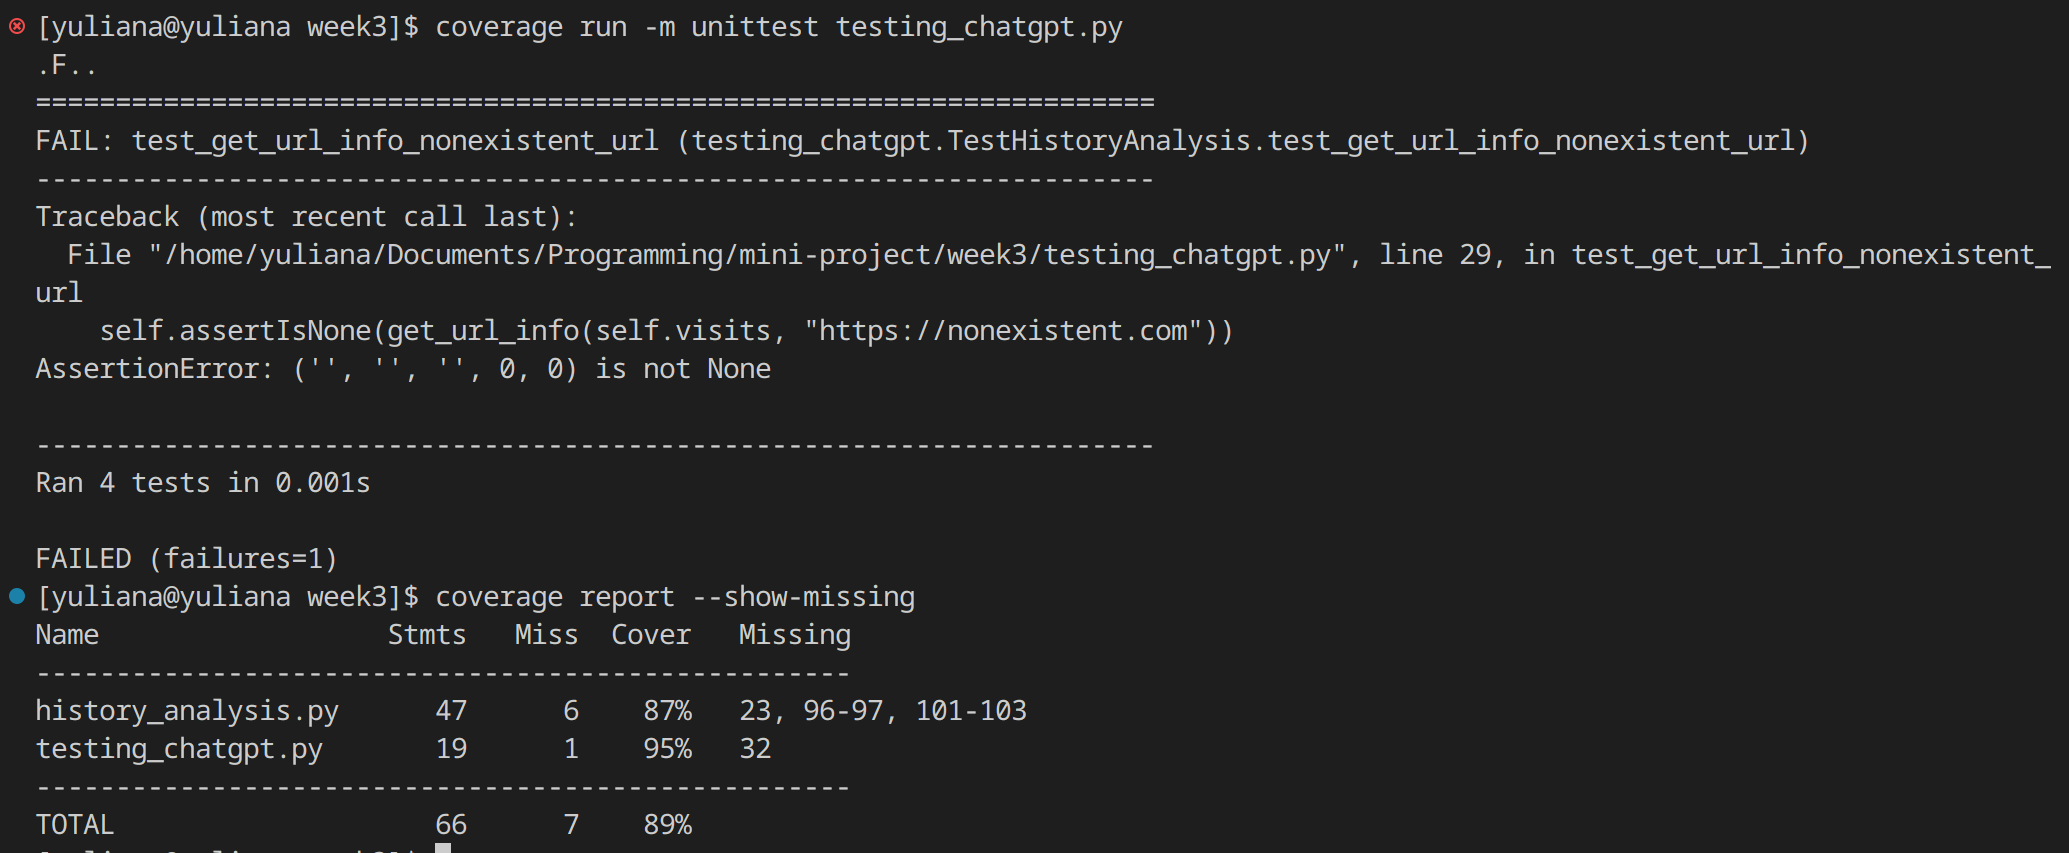

Request 3:
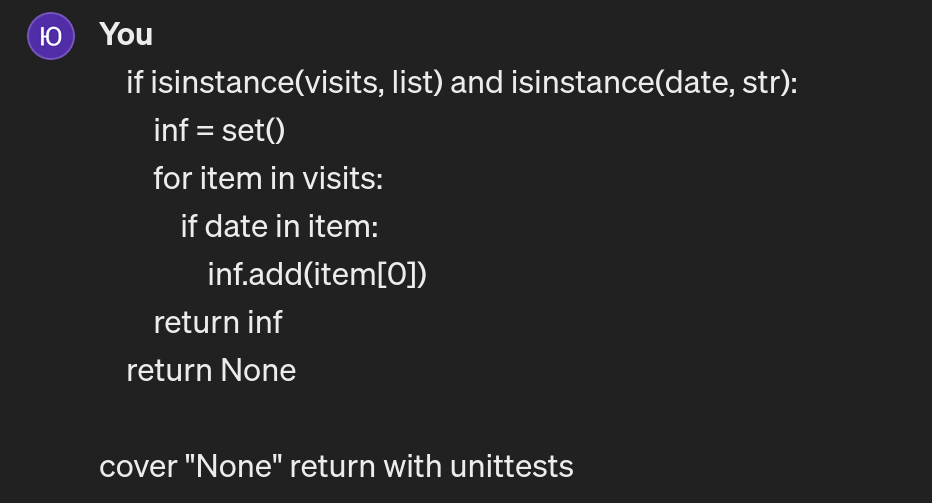


Generated code:

In [ ]:
import unittest
from history_analysis import sites_on_date, most_frequent_sites, get_url_info

class TestHistoryAnalysis(unittest.TestCase):

    # Sample browser history data for testing
    visits = [
        ("https://example.com", "Example Domain", "2024-04-24", "12:30:00", 10),
        ("https://example.com", "Example Domain", "2024-04-25", "14:45:00", 5),
        ("https://example2.com", "Example 2", "2024-04-24", "13:00:00", 8),
        ("https://example3.com", "Example 3", "2024-04-25", "15:00:00", 3)
    ]

    def test_sites_on_date(self):
        self.assertEqual(sites_on_date(self.visits, "2024-04-24"), {"https://example.com", "https://example2.com"})
        self.assertEqual(sites_on_date(self.visits, "2024-04-25"), {"https://example.com", "https://example3.com"})

    def test_most_frequent_sites(self):
        self.assertEqual(most_frequent_sites(self.visits, 1), {"https://example.com"})
        self.assertEqual(most_frequent_sites(self.visits, 2), {"https://example.com", "https://example2.com"})
        self.assertEqual(most_frequent_sites(self.visits, 3), {"https://example.com", "https://example2.com", "https://example3.com"})

    def test_get_url_info(self):
        self.assertEqual(get_url_info(self.visits, "https://example.com"), ("Example Domain", "2024-04-25", "14:45:00", 2, 7.5))
        self.assertEqual(get_url_info(self.visits, "https://example2.com"), ("Example 2", "2024-04-24", "13:00:00", 1, 8))
        self.assertEqual(get_url_info(self.visits, "https://example3.com"), ("Example 3", "2024-04-25", "15:00:00", 1, 3))

    def test_sites_on_date_non_list(self):
        self.assertIsNone(sites_on_date("not_a_list", "2024-04-24"))

    def test_sites_on_date_non_string_date(self):
        self.assertIsNone(sites_on_date(self.visits, 123))

if __name__ == '__main__':
    unittest.main()


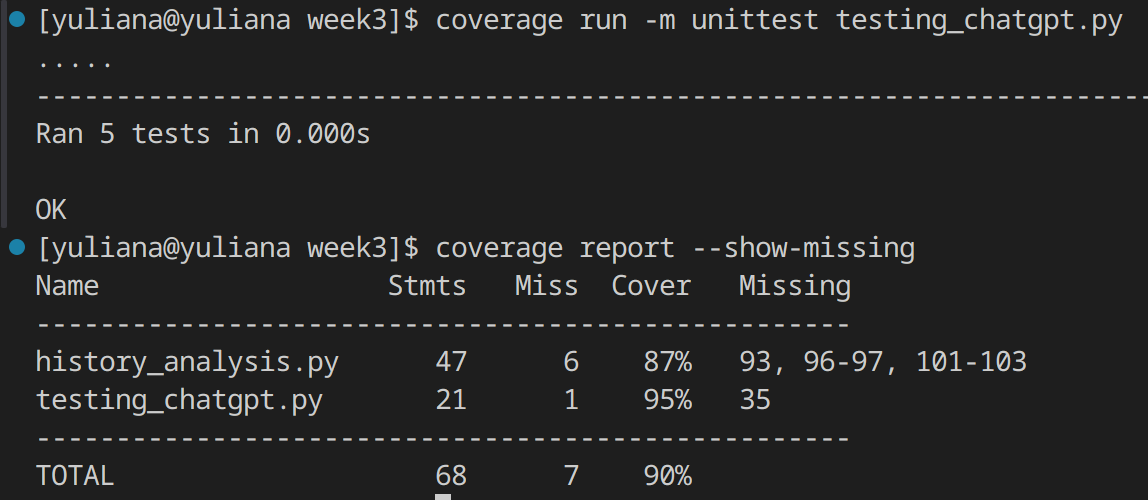

Request 4:
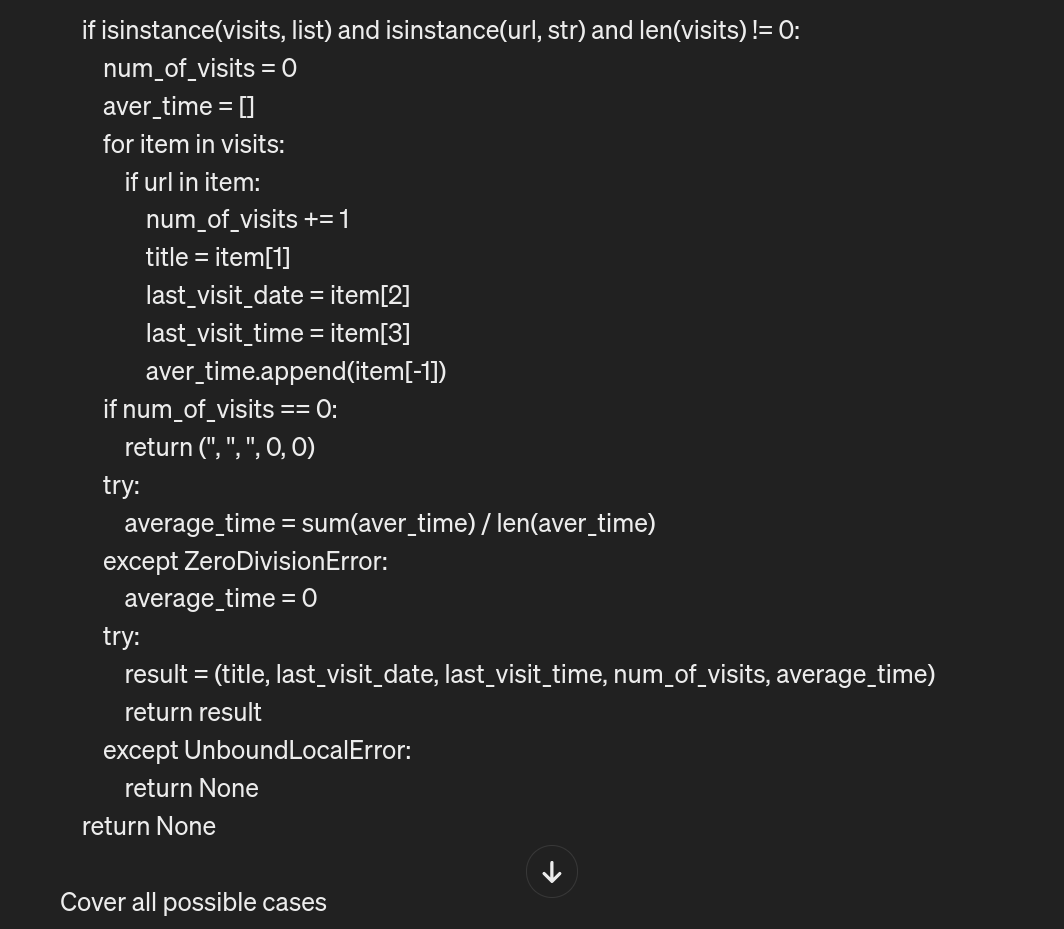

Generated code:

In [ ]:
import unittest
from history_analysis import get_url_info

class TestGetUrlInfo(unittest.TestCase):

    def test_not_list_visits(self):
        self.assertIsNone(get_url_info("not_a_list", "https://www.youtube.com/"))

    def test_not_string_url(self):
        self.assertIsNone(get_url_info([], 123))

    def test_empty_visits(self):
        self.assertEqual(get_url_info([], "https://mail.google.com/mail/u/0/"), ('', '', '', 0, 0))

    def test_url_not_found(self):
        self.assertIsNone(get_url_info([('https://www.google.com/', 'Google', '2024-04-25', '14:45:00', 5)], "https://www.youtube.com/"))

    def test_single_visit(self):
        visits = [('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:55.421209', 757275)]
        self.assertEqual(get_url_info(visits, "https://www.youtube.com/?hl=uk&gl=UA"), ('YouTube', '2023-10-21', '14:26:55.421209', 1, 757275))

    def test_multiple_visits(self):
        visits = [
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:55.421209', 757275),
            ('https://www.youtube.com/?hl=uk&gl=UA', 'YouTube', '2023-10-21', '14:26:56.177574', 105387),
            ('https://www.youtube.com/?hl=uk&gl=UA&themeRefresh=1', 'YouTube', '2023-10-21', '14:26:56.281244', 1143648),
            ('https://www.youtube.com/', 'YouTube', '2023-10-21', '14:26:57.423119', 150277232)
        ]
        self.assertEqual(get_url_info(visits, "https://www.youtube.com/?hl=uk&gl=UA"), ('YouTube', '2023-10-21', '14:26:55.421209', 4, 629383.0))

if __name__ == '__main__':
    unittest.main()

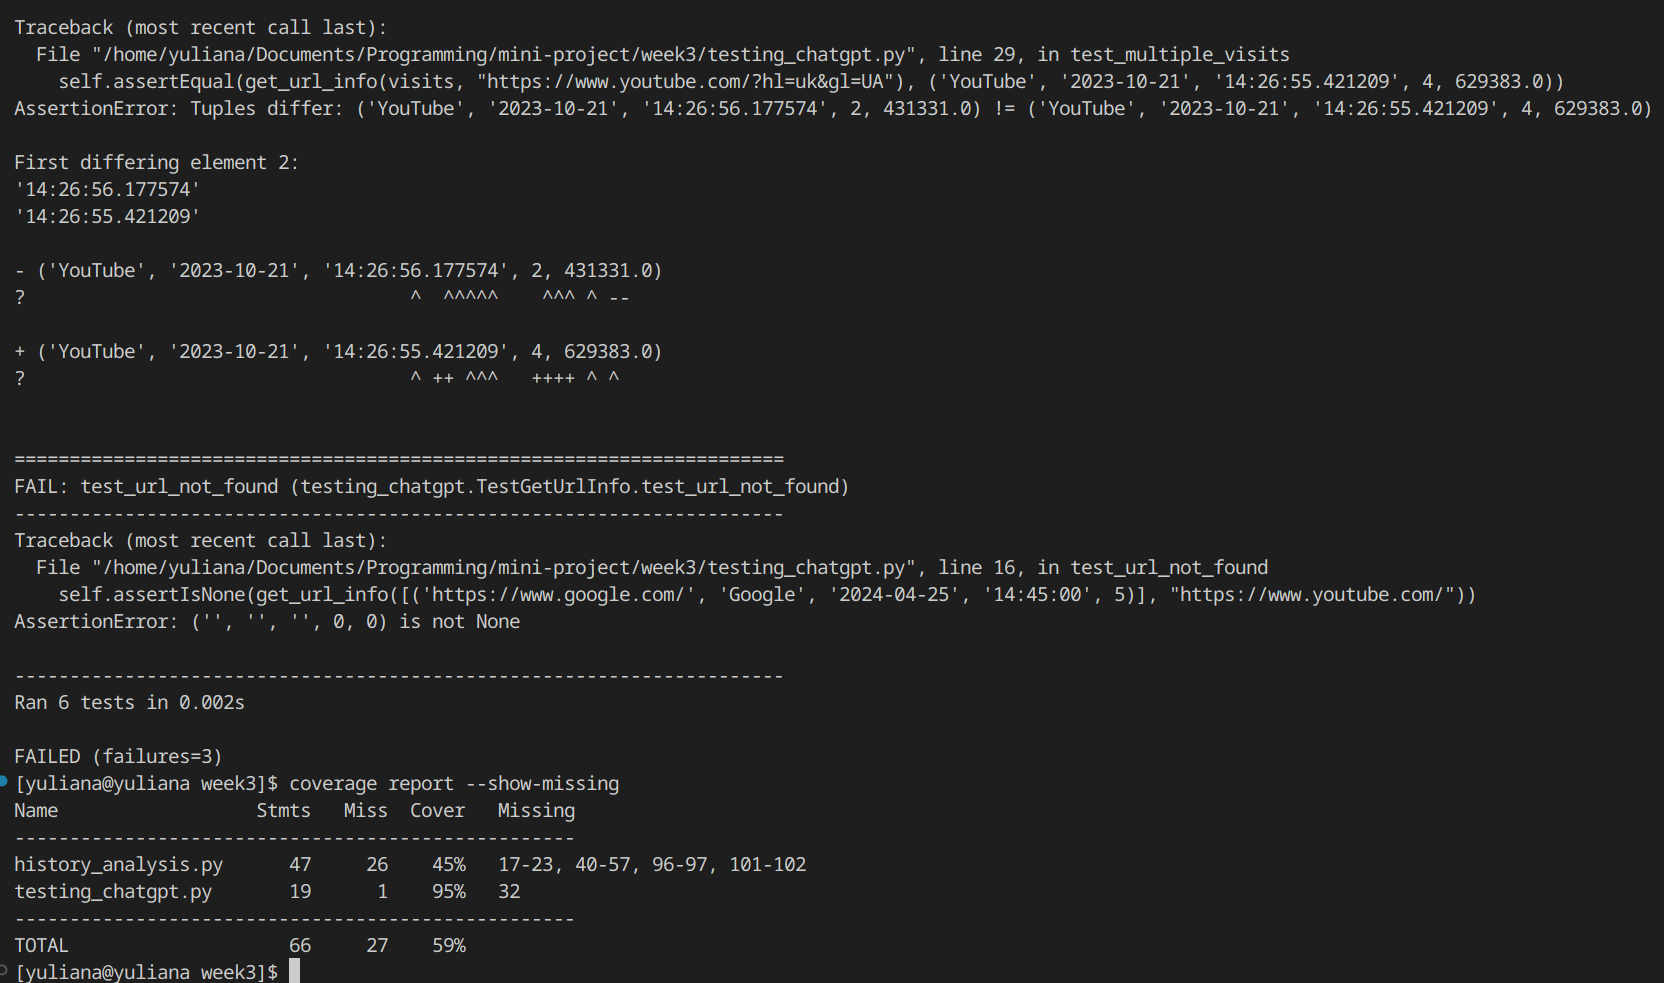

Request 5: Try to cover get_url_info function

Generated code:

In [ ]:
import unittest
from history_analysis import sites_on_date, most_frequent_sites, get_url_info

class TestHistoryAnalysis(unittest.TestCase):

    # Sample browser history data for testing
    visits = [
        ("https://example.com", "Example Domain", "2024-04-24", "12:30:00", 10),
        ("https://example.com", "Example Domain", "2024-04-25", "14:45:00", 5),
        ("https://example2.com", "Example 2", "2024-04-24", "13:00:00", 8),
        ("https://example3.com", "Example 3", "2024-04-25", "15:00:00", 3)
    ]

    def test_sites_on_date(self):
        self.assertEqual(sites_on_date(self.visits, "2024-04-24"), {"https://example.com", "https://example2.com"})
        self.assertEqual(sites_on_date(self.visits, "2024-04-25"), {"https://example.com", "https://example3.com"})

    def test_most_frequent_sites(self):
        self.assertEqual(most_frequent_sites(self.visits, 1), {"https://example.com"})
        self.assertEqual(most_frequent_sites(self.visits, 2), {"https://example.com", "https://example2.com"})
        self.assertEqual(most_frequent_sites(self.visits, 3), {"https://example.com", "https://example2.com", "https://example3.com"})

    def test_get_url_info(self):
        self.assertEqual(get_url_info(self.visits, "https://example.com"), ("Example Domain", "2024-04-25", "14:45:00", 2, 7.5))
        self.assertEqual(get_url_info(self.visits, "https://example2.com"), ("Example 2", "2024-04-24", "13:00:00", 1, 8))
        self.assertEqual(get_url_info(self.visits, "https://example3.com"), ("Example 3", "2024-04-25", "15:00:00", 1, 3))

    def test_get_url_info_url_not_found(self):
        self.assertEqual(get_url_info(self.visits, "https://example4.com"), ('', '', '', 0, 0))

    def test_get_url_info_multiple_visits(self):
        visits = [
            ("https://example.com", "Example Domain", "2024-04-24", "12:30:00", 10),
            ("https://example.com", "Example Domain", "2024-04-25", "14:45:00", 5),
            ("https://example.com", "Example Domain", "2024-04-26", "16:00:00", 15)
        ]
        self.assertEqual(get_url_info(visits, "https://example.com"), ("Example Domain", "2024-04-26", "16:00:00", 3, (10 + 5 + 15) / 3))

    def test_get_url_info_no_visits(self):
        self.assertEqual(get_url_info([], "https://example.com"), ('', '', '', 0, 0))

    def test_get_url_info_zero_average(self):
        visits = [("https://example.com", "Example Domain", "2024-04-24", "12:30:00", 0)]
        self.assertEqual(get_url_info(visits, "https://example.com"), ("Example Domain", "2024-04-24", "12:30:00", 1, 0))

    def test_get_url_info_single_visit(self):
        visits = [("https://example.com", "Example Domain", "2024-04-24", "12:30:00", 10)]
        self.assertEqual(get_url_info(visits, "https://example.com"), ("Example Domain", "2024-04-24", "12:30:00", 1, 10))

if __name__ == '__main__':
    unittest.main()

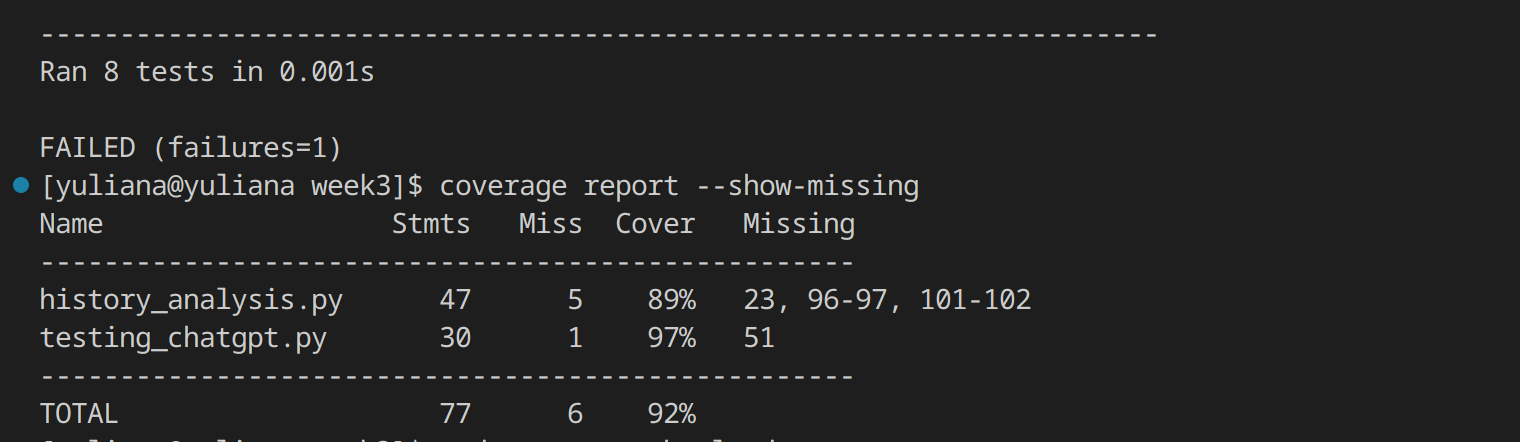

Request 7: 
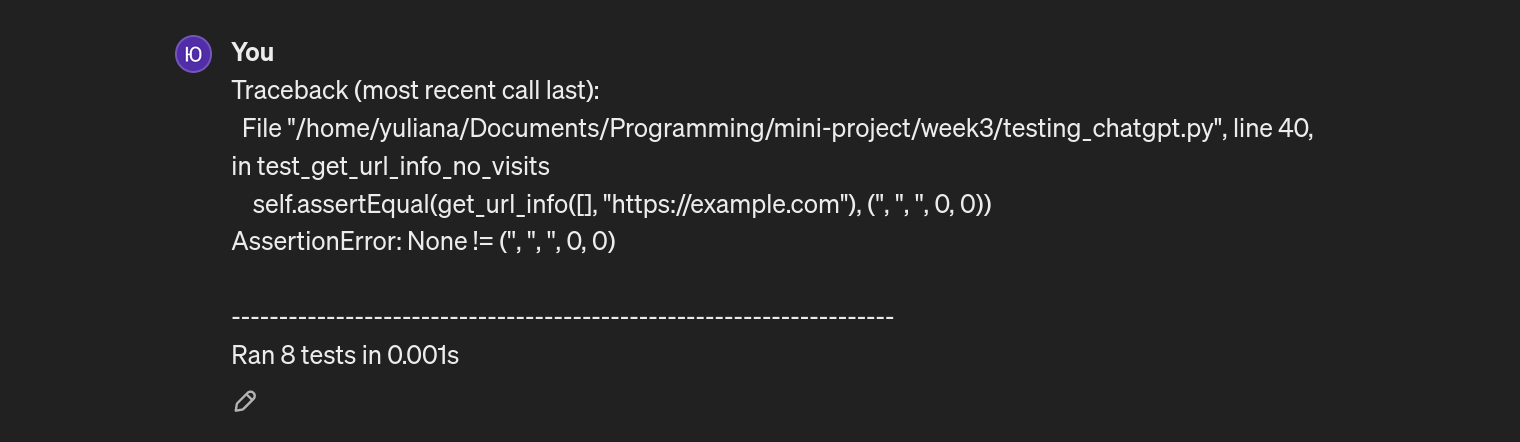

Generated code:

In [ ]:
def get_url_info(visits: list, url: str) -> tuple:
    """
    Returns tuple with info about site, which title is passed
    Function should return:
    title - title of site with this url
    last_visit_date - date of the last visit of this site, in format "yyyy-mm-dd"
    last_visit_time - time of the last visit of this site, in format "hh:mm:ss.ms"
    num_of_visits - how much time was this site visited
    average_time - average time, spend on this site
    :param visits: all visits in browser history
    :param url: url of site to search
    :return: (title, last_visit_date, last_visit_time, num_of_visits, average_time)
    """
    if isinstance(visits, list) and isinstance(url, str) and len(visits) != 0:
        num_of_visits = 0
        aver_time = []
        for item in visits:
            if url in item:
                num_of_visits += 1
                title = item[1]
                last_visit_date = item[2]
                last_visit_time = item[3]
                aver_time.append(item[-1])
        if num_of_visits == 0:
            return ('', '', '', 0, 0)  # Return empty tuple when there are no visits
        try:
            average_time = sum(aver_time) / num_of_visits  # Fixing average calculation
        except ZeroDivisionError:
            average_time = 0
        return title, last_visit_date, last_visit_time, num_of_visits, average_time
    return None

Testing:
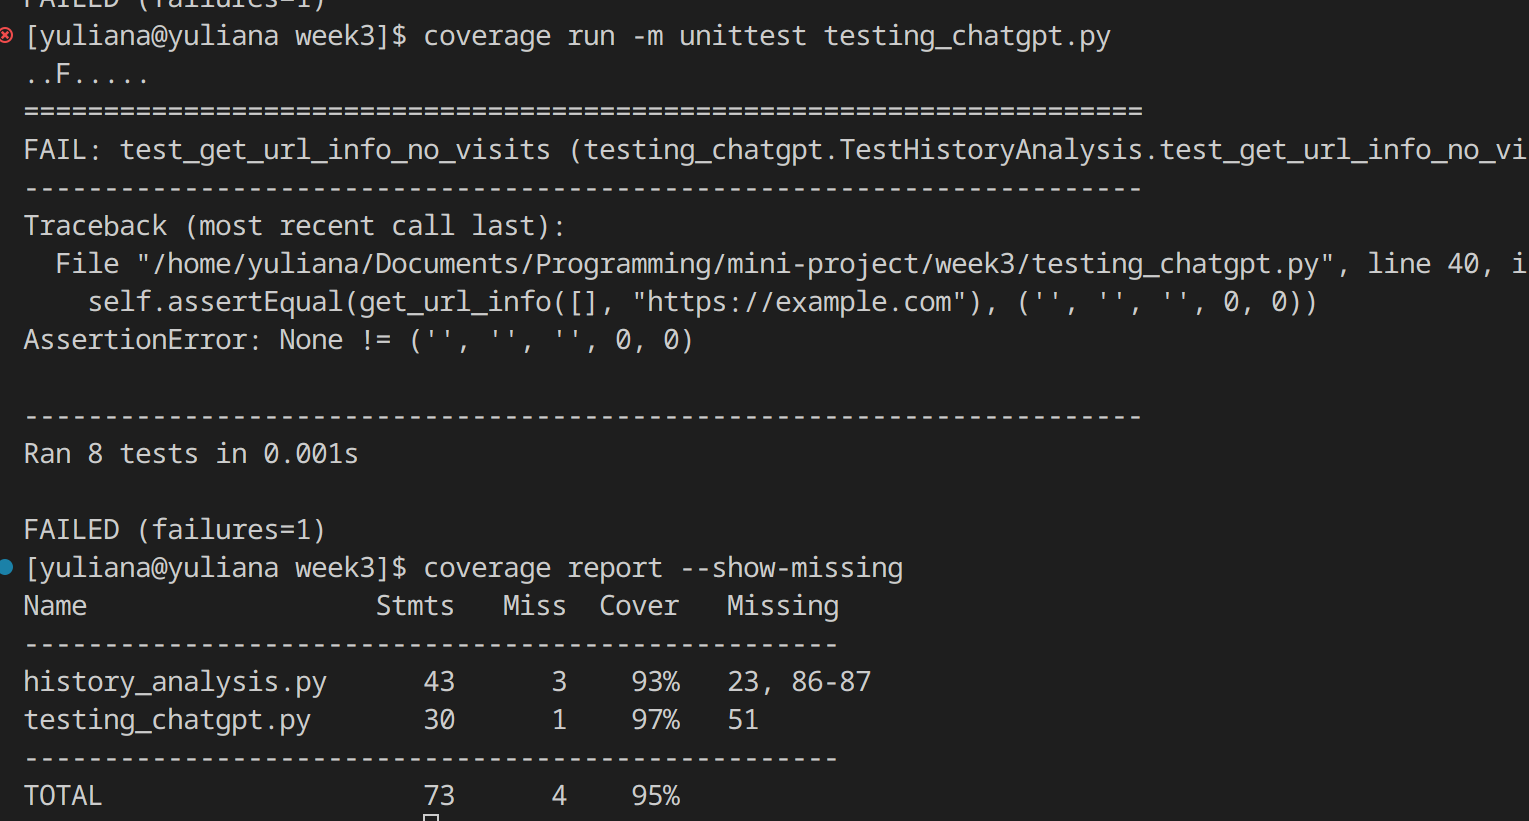

Request 8:
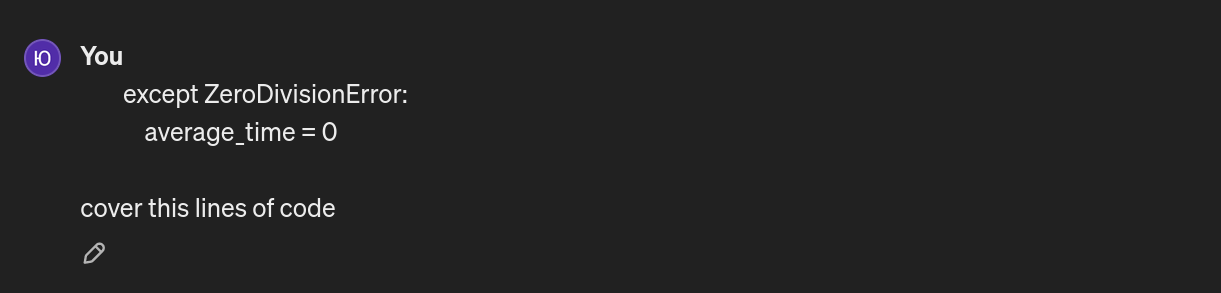

Generated code:

In [ ]:
import unittest
from history_analysis import get_url_info

class TestGetUrlInfo(unittest.TestCase):

    def test_get_url_info_zero_average(self):
        visits = [("https://example.com", "Example Domain", "2024-04-24", "12:30:00", 0)]  # Total time is zero
        self.assertEqual(get_url_info(visits, "https://example.com"), ("Example Domain", "2024-04-24", "12:30:00", 1, 0))

if __name__ == '__main__':
    unittest.main()

After a lot of requests ChatGPT still didn`t manage this task.